# <font color='blue'>Projeto de Data Science Completo </font>
### <font color='blue'>Modelagem preditiva prevendo preço de imóveis</font>

## <font color='blue'>Problema de Negócio-Objetivo</font>

Neste projeto iremos analisar dados de preço de imóveis no Airbnb no Rio de Janeiro.

Nosso objetivo é criar um modelo de previsão para prever preço de imóveis dados caracteristicas sobre estes imóveis

        Dessa forma , uma pessoa pode saber se aquele imóvel que ela estar olhando estar acima ou abaixo do preço comparado a outro imoveis com as mesmas caracteristicas

        E o ofertante do imóvel pode saber qual preço cobrar a diária de seu imóvel

As bases de dados foram retiradas da plataforma kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

## <font color='blue'>Carregamento dos dados </font>

#### <font color='blue'>Importação das Bibliotecas </font>

In [142]:
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
# Bibliotecas de plotagem
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Biblioteca de Estatítica
from scipy.stats import normaltest
# Bibliotecas para Codificação
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import scipy
# Biblioteca do SO
import pathlib
# Biblioteca de Machine Learning
import sklearn
from sklearn.metrics import r2_score,mean_squared_error
# Importação dos modelos a ser testados
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
# Importação para dividir entre treino e teste
from sklearn.model_selection import train_test_split

#### <font color='blue'>Importação do conjunto de dados </font>

Nosso conjunto de dados estão organizados onde temos diversos arquivos csv de maneira separada

Então vamos transformar em uma base única  com uma única tabela

Primeiro vamos pecorrer por todos os arquivos na pasta para pegar todos os arquivos de uma vez

Uma coisa bem importante que devemos ter atenção é que não podemos perder as informações dos meses, por isso temos que adicionar no df

In [2]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pathlib.Path('dataset')

dfs = []

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]

    tabela = pd.read_csv(caminho_bases / arquivo.name, low_memory=False)
    tabela['mes'] = mes
    dfs.append(tabela)

df = pd.concat(dfs, ignore_index=True)

display(df)

id                            listing_url       scrape_id  \
0          14063     https://www.airbnb.com/rooms/14063  20180414160018   
1          17878     https://www.airbnb.com/rooms/17878  20180414160018   
2          24480     https://www.airbnb.com/rooms/24480  20180414160018   
3          25026     https://www.airbnb.com/rooms/25026  20180414160018   
4          31560     https://www.airbnb.com/rooms/31560  20180414160018   
...          ...                                    ...             ...   
902205  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
902206  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
902207  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
902208  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
902209  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

       last_scraped                                          name  \
0        2018-04-14                          Living in a Postcard   
1        2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2        2018-04-14              Nice and cozy near Ipanema Beach   
3        2018-04-14     Beautiful Modern Decorated Studio in Copa   
4        2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...             ...                                           ...   
902205   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
902206   2019-09-24                      Alugo para o Rock in Rio   
902207   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
902208   2019-09-24                     Cobertura Cinematografica   
902209   2019-09-24     Quarto em cobertura em frente à praia III   

                                                  summary  \
0       Besides the most iconic's view, our apartment ...   
1       Please note that special rates apply for New Y...   
2       My studio is located in the best  of Ipanema. ...   
3       Our apartment is a little gem, everyone loves ...   
4       This nice and clean 1 bedroom apartment is loc...   
...                                                   ...   
902205  Em estilo contemporâneo, o Transamerica Prime ...   
902206  Confortável apartamento, 2 quartos , sendo 1 s...   
902207  Apartamento quarto e sala COMPLETO para curtas...   
902208                               Cobertura alto nivel   
902209  Quarto em cobertura quadriplex com vista lindí...   

                                                    space  \
0                                                     NaN   
1       - large balcony which looks out on pedestrian ...   
2       The studio is located at Vinicius de Moraes St...   
3       This newly renovated studio (last renovations ...   
4       This nice and clean 1 bedroom apartment is loc...   
...                                                   ...   
902205                                                NaN   
902206  O apartamento estará com mobília completa disp...   
902207  Espaço ideal para até 5 pessoas. Cama de casal...   
902208                                                NaN   
902209                                                NaN   

                                              description experiences_offered  \
0       Besides the most iconic's view, our apartment ...                none   
1       Please note that special rates apply for New Y...                none   
2       My studio is located in the best  of Ipanema. ...                none   
3       Our apartment is a little gem, everyone loves ...                none   
4       This nice and clean 1 bedroom apartment is loc...                none   
...                                                   ...                 ...   
902205  Em estilo contemporâneo, o Transamerica Prime ...                none   
902206  Confortável apartamento, 2 quartos , sendo 1 s...                none   
902207  Apartamento quarto e sala COMPLETO para curtas...                none   
902208  

## <font color='blue'>Análise Exploratória Inicial</font>

In [3]:
# Quantidade de Linhas e colunas
df.shape

(902210, 107)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902210 entries, 0 to 902209
Columns: 107 entries, id to calculated_host_listings_count_shared_rooms
dtypes: float64(31), int64(14), object(62)
memory usage: 736.5+ MB


In [5]:
# Verificando nossos atributos sem que o python resuma
print(list(df.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [6]:
# Verifica a quantidade de Valores ausentes em todo meu dataframe
def func_calc_percentual_valores_ausentes(df):
    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    print("O dataset tem", round(((totalMissing/totalCells) * 100), 2), "%", "de valores ausentes.")

In [7]:
# Executaa função
func_calc_percentual_valores_ausentes(df)

O dataset tem 22.72 % de valores ausentes.


In [8]:
# Calculando o total de valores ausentes e o percentual por variável e colocando em um Dataset
# Função para calcular valores ausentes por coluna
def func_calc_percentual_valores_ausentes_coluna(df):
    # Total de valores ausentes
    mis_val = df.isnull().sum()
    # Porcentagem de valores ausentes
    mis_val_percent = 100 * mis_val / len(df)
    # Tipo de dado das colunas com valores ausentes
    mis_val_dtype = df.dtypes
    # Cria uma tabela com os resultados
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)
    # Renomear as colunas
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Dtype'})
    # Classifica a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores faltantes
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Ausentes', ascending = False).round(2)
    # Print 
    print ("O dataset tem " + str(df.shape[1]) + " colunas.\n"
        "Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " colunas que têm valores ausentes.")
    if mis_val_table_ren_columns.shape[0] == 0:
        return
    # Retorna o dataframe com informações ausentes
    return mis_val_table_ren_columns

In [9]:
func_calc_percentual_valores_ausentes(df)
df_missing = func_calc_percentual_valores_ausentes_coluna(df)
# Visualizando o Dataframe
df_missing

O dataset tem 22.72 % de valores ausentes.
O dataset tem 107 colunas.
Encontrado: 65 colunas que têm valores ausentes.


Valores Ausentes  % de Valores Ausentes    Dtype
xl_picture_url                          902210                 100.00  float64
jurisdiction_names                      902210                 100.00  float64
neighbourhood_group_cleansed            902210                 100.00  float64
thumbnail_url                           902210                 100.00  float64
medium_url                              902210                 100.00  float64
...                                        ...                    ...      ...
host_picture_url                           460                   0.05   object
host_thumbnail_url                         460                   0.05   object
host_is_superhost                          460                   0.05   object
host_since                                 460                   0.05   object
host_name                                  460                   0.05   object

[65 rows x 3 columns]

## <font color='blue'>Limpeza dos dados</font>

Aqui vamos aplicar 4 técnicas de Limpeza de Dados:
        
        1- Remoção de variáveis desnecessária
        2- Tratamento de Valores ausentes
        3- Alteração no tipo de dados
        4- Tratamento de valores duplicados

#### <font color='blue'>Remoção de Colunas</font>

Vamos começar excluindo as colunas que não vão ser relevantes para nossa análise

Excluindo:

    variáveis constantes (variáveis que apresenta um único valor)
    variáveis de "url" 
    variáveis de "Id" e com "códigos"
    Variáveis desbalanceadas
    variáveis que apresentam a mesma informação ( Corre o risco de enviesamento )
    variáveis de texto livres (Não aplicaremos algoritmos de textos)

Para isso, vamos ver todos os valores unicos de todas variáveis

In [10]:
# Verificando valores únicos
for col in list(df.columns):
    
    # Obtém uma lista de valores únicos
    list_of_unique_values = df[col].unique()
    
    # Se o número de valores exclusivos for menor que 15, imprima os valores. 
    # Caso contrário, imprima o número de valores exclusivos
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



id: 70185 valores únicos


listing_url: 70185 valores únicos


scrape_id: 25 valores únicos


last_scraped: 54 valores únicos


name: 81219 valores únicos


summary: 76584 valores únicos


space: 46382 valores únicos


description: 87199 valores únicos


experiences_offered: 1 valores únicos
['none']


neighborhood_overview: 35965 valores únicos


notes: 22239 valores únicos


transit: 35328 valores únicos


access: 29361 valores únicos


interaction: 30432 valores únicos


house_rules: 35328 valores únicos


thumbnail_url: 1 valores únicos
[nan]


medium_url: 1 valores únicos
[nan]


picture_url: 80902 valores únicos


xl_picture_url: 1 valores únicos
[nan]


host_id: 43180 valores únicos


host_url: 43180 valores únicos


host_name: 10252 valores únicos


host_since: 3419 valores únicos


host_location: 1846 valores únicos


host_about: 19259 valores únicos


host_response_time: 5 valores únicos
[nan 'within an hour' 'within a day' 'within a few hours'
 'a few days or more']


host

Para facilitar nossa análise, vamos levar esse dataframe para o excel e de lá pegarmos somente as colunas necessárias

Exportaremos somente os 1000 primeiros registros

In [11]:
# Exportar para csv
df.head(1000).to_csv('primeiros_registros.csv', sep=';')

Depois da nossa análise, aqui estão as colunas que vamos precisar:
    

In [12]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','mes']
# Transformando em um dataframe
df = df.loc[:, colunas]
print(list(df.columns))
display(df)

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'mes']


host_response_time host_response_rate host_is_superhost  \
0                      NaN                NaN                 f   
1           within an hour               100%                 t   
2           within an hour               100%                 f   
3           within an hour               100%                 f   
4           within an hour               100%                 t   
...                    ...                ...               ...   
902205      within an hour                93%                 f   
902206                 NaN                NaN                 f   
902207  within a few hours                74%                 f   
902208                 NaN                NaN                 f   
902209  a few days or more                38%                 f   

        host_listings_count   latitude  longitude property_type  \
0                       1.0 -22.946854 -43.182737     Apartment   
1                       2.0 -22.965919 -43.178962   Condominium   
2                       1.0 -22.985698 -43.201935     Apartment   
3                       3.0 -22.977117 -43.190454     Apartment   
4                       1.0 -22.983024 -43.214270     Apartment   
...                     ...        ...        ...           ...   
902205                  0.0 -23.003180 -43.342840     Apartment   
902206                  0.0 -22.966640 -43.393450     Apartment   
902207                 32.0 -22.962080 -43.175520     Apartment   
902208                  0.0 -23.003400 -43.341820     Apartment   
902209                  5.0 -23.010560 -43.363350     Apartment   

              room_type  accommodates  bathrooms  ...  review_scores_accuracy  \
0       Entire home/apt             4        1.0  ...                     9.0   
1       Entire home/apt             5        1.0  ...                    10.0   
2       Entire home/apt             2        1.0  ...                    10.0   
3       Entire home/apt             3        1.0  ...                     9.0   
4       Entire home/apt             3        1.0  ...                    10.0   
...                 ...           ...        ...  ...                     ...   
902205  Entire home/apt             4        1.0  ...                     NaN   
902206  Entire home/apt             4        2.0  ...                     NaN   
902207  Entire home/apt             5        1.0  ...                     NaN   
902208  Entire home/apt             4        1.0  ...                     NaN   
902209     Private room             2        0.0  ...                     NaN   

        review_scores_cleanliness review_scores_checkin  \
0                             9.0                   9.0   
1                             9.0                  10.0   
2                            10.0                  10.0   
3                            10.0                  10.0   
4                            10.0                  10.0   
...                           ...                   ...   
902205                        NaN                   NaN   
902206                        NaN                   NaN   
902207                        NaN                   NaN   
902208                        NaN                   NaN   
902209                        NaN                   NaN   

       review_scores_communication review_scores_location review_scores_value  \
0                              9.0                    9.0                 9.0   
1                             10.0                    9.0                 9.0   
2                             10.0                   10.0                 9.0   
3                             10.0                   10.0                 9.0   
4                             10.0                   10.0                 9.0   
...                            ...                    ...                 ...   
902205                         NaN                    NaN                 NaN   
902206                         NaN                    NaN           

#### <font color='blue'>Tratamento de Valores ausentes</font>

In [13]:
func_calc_percentual_valores_ausentes(df)
df_missing = func_calc_percentual_valores_ausentes_coluna(df)
# Visualizando o Dataframe
df_missing

O dataset tem 15.73 % de valores ausentes.
O dataset tem 33 colunas.
Encontrado: 16 colunas que têm valores ausentes.


Valores Ausentes  % de Valores Ausentes    Dtype
review_scores_checkin                  448650                  49.73  float64
review_scores_accuracy                 448586                  49.72  float64
review_scores_location                 448553                  49.72  float64
review_scores_value                    448551                  49.72  float64
review_scores_communication            448415                  49.70  float64
review_scores_cleanliness              448413                  49.70  float64
review_scores_rating                   448016                  49.66  float64
security_deposit                       421280                  46.69   object
host_response_rate                     401846                  44.54   object
host_response_time                     401843                  44.54   object
cleaning_fee                           313506                  34.75   object
beds                                     2502                   0.28  float64
bathrooms                                1724                   0.19  float64
bedrooms                                  850                   0.09  float64
host_is_superhost                         460                   0.05   object
host_listings_count                       460                   0.05  float64

Vamos excluir as variáveis com mais de 30% de valores ausentes

In [14]:
# Criando uma lista das variáveis que serão excluidas
lista=df_missing[df_missing['% de Valores Ausentes']>30].index.tolist()

In [15]:
# Fazendo o delete
df=df.drop(lista,axis=1)

In [16]:
# Avaliação
func_calc_percentual_valores_ausentes(df)
df_missing = func_calc_percentual_valores_ausentes_coluna(df)
# Visualizando o Dataframe
df_missing

O dataset tem 0.03 % de valores ausentes.
O dataset tem 22 colunas.
Encontrado: 5 colunas que têm valores ausentes.


Valores Ausentes  % de Valores Ausentes    Dtype
beds                             2502                   0.28  float64
bathrooms                        1724                   0.19  float64
bedrooms                          850                   0.09  float64
host_is_superhost                 460                   0.05   object
host_listings_count               460                   0.05  float64

Vamos criar um dataframe para avarliarmos essas colunas de maneira estatítica

Para ver se podemos substituir esses valores ausentes pela media, moda ou mediana

In [17]:
df_teste=df[['beds','bathrooms','bedrooms','host_is_superhost','host_listings_count']]

In [18]:
df_teste.describe()

beds      bathrooms       bedrooms  host_listings_count
count  899708.000000  900486.000000  901360.000000        901750.000000
mean        2.600196       1.694549       1.644639             8.529062
std         2.068310       1.197783       1.077933            46.985890
min         0.000000       0.000000       0.000000             0.000000
25%         1.000000       1.000000       1.000000             1.000000
50%         2.000000       1.000000       1.000000             1.000000
75%         3.000000       2.000000       2.000000             3.000000
max        86.000000     200.000000      45.000000          1495.000000

Ainda não estar muito claro, vamos calcular o "valor p" para ver se estas variáveis seguem ou não uma distribuição normal

In [19]:
# Criando uma Lista com as variáveis numéricas
atributos = ['beds','bathrooms','bedrooms','host_listings_count']
# Loop
# Loop
for i in atributos:
    # Calculando a normalidade
    stats, pval = normaltest(df[i])
     # Checando o valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

beds : Distribuição Não Normal
bathrooms : Distribuição Não Normal
bedrooms : Distribuição Não Normal
host_listings_count : Distribuição Não Normal


Se nenhuma dessas varáveis seguem uma distribuição normal ,e como todas elas são variáveis quantitativas, vou aplicar a técnica B-FILL para todas essas variáveis

In [20]:
# Fazendo o preenchimento reverso 
# Imputação de valores ausentes usando backward fill
def fix_missing_bfill(df, col):
    count = df[col].isna().sum()
    df[col] = df[col].fillna(method = 'bfill')
    print(f"{count} valores ausentes na coluna {col} foram substituídos usando o método de preenchimento reverso.")
    return df[col]

In [21]:
fix_missing_bfill(df,'beds')
fix_missing_bfill(df,'bathrooms')
fix_missing_bfill(df,'bedrooms')
fix_missing_bfill(df,'host_is_superhost')
fix_missing_bfill(df,'host_listings_count')

2502 valores ausentes na coluna beds foram substituídos usando o método de preenchimento reverso.
1724 valores ausentes na coluna bathrooms foram substituídos usando o método de preenchimento reverso.
850 valores ausentes na coluna bedrooms foram substituídos usando o método de preenchimento reverso.
460 valores ausentes na coluna host_is_superhost foram substituídos usando o método de preenchimento reverso.
460 valores ausentes na coluna host_listings_count foram substituídos usando o método de preenchimento reverso.


0          1.0
1          2.0
2          1.0
3          3.0
4          1.0
          ... 
902205     0.0
902206     0.0
902207    32.0
902208     0.0
902209     5.0
Name: host_listings_count, Length: 902210, dtype: float64

In [22]:
# Avaliação
func_calc_percentual_valores_ausentes(df)
df_missing = func_calc_percentual_valores_ausentes_coluna(df)
# Visualizando o Dataframe
df_missing

O dataset tem 0.0 % de valores ausentes.
O dataset tem 22 colunas.
Encontrado: 0 colunas que têm valores ausentes.


#### <font color='blue'>Alterar o Tipo de Dados</font>

In [23]:
df.shape

(902210, 22)

In [24]:
# Verifica as colunas e os tipos de cada uma
print(df.dtypes)
# Traço de divisão
print('-'*60)
# Pega o 1° valor de cada coluna na minha tabela
print(df.iloc[3])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count                                    

As variáveis `price` e ` extra_people` estão como object por que possuem o caracter "$" e a ","

Porém são duas variáveis do tipo float

Vamos primeiro substituir esses caracteres e depois vamos fazer a transformação para o tipo adequado

In [25]:
# Vamos substituir o caracter "$" por ""
df['price']=df['price'].str.replace('$',' ')
df['price']=df['price'].str.replace(',','')
df['extra_people']=df['extra_people'].str.replace('$',' ')
df['extra_people']=df['extra_people'].str.replace(',','')

In [26]:
# Criar uma funcao que converte a variavel para o tipo de string
def convert_to_float(df, columns):
    for col in columns:
        df[col] = df[col].astype("float")

In [27]:
convert_to_float(df, ['price'])

In [28]:
# Verifica as colunas e os tipos de cada uma
print(df.dtypes)
# Traço de divisão
print('-'*60)
# Pega o 1° valor de cada coluna na minha tabela
print(df.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float64
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count                                    

#### <font color='blue'>Tratamento de valores duplicados</font>

Vamos aplicar uma função que encontra e remove linhas duplicadas

In [29]:
# Criando minha funcao
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace = True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("Nenhuma linha duplicada foi encontrada.")
    else:
        print(f"{count} linhas duplicadas foram encontradas e removidas.")

In [30]:
# Executa a função
drop_duplicates(df)

4903 linhas duplicadas foram encontradas e removidas.


In [31]:
# Avaliação
df

host_is_superhost  host_listings_count   latitude  longitude  \
0                      f                  1.0 -22.946854 -43.182737   
1                      t                  2.0 -22.965919 -43.178962   
2                      f                  1.0 -22.985698 -43.201935   
3                      f                  3.0 -22.977117 -43.190454   
4                      t                  1.0 -22.983024 -43.214270   
...                  ...                  ...        ...        ...   
902205                 f                  0.0 -23.003180 -43.342840   
902206                 f                  0.0 -22.966640 -43.393450   
902207                 f                 32.0 -22.962080 -43.175520   
902208                 f                  0.0 -23.003400 -43.341820   
902209                 f                  5.0 -23.010560 -43.363350   

       property_type        room_type  accommodates  bathrooms  bedrooms  \
0          Apartment  Entire home/apt             4        1.0       0.0   
1        Condominium  Entire home/apt             5        1.0       2.0   
2          Apartment  Entire home/apt             2        1.0       1.0   
3          Apartment  Entire home/apt             3        1.0       1.0   
4          Apartment  Entire home/apt             3        1.0       1.0   
...              ...              ...           ...        ...       ...   
902205     Apartment  Entire home/apt             4        1.0       0.0   
902206     Apartment  Entire home/apt             4        2.0       2.0   
902207     Apartment  Entire home/apt             5        1.0       1.0   
902208     Apartment  Entire home/apt             4        1.0       1.0   
902209     Apartment     Private room             2        0.0       1.0   

        beds  ...  price guests_included  extra_people  minimum_nights  \
0        2.0  ...  133.0               2         34.00              60   
1        2.0  ...  270.0               2         51.00               4   
2        1.0  ...  222.0               2        215.00               3   
3        2.0  ...  161.0               2         45.00               4   
4        2.0  ...  222.0               2         68.00               2   
...      ...  ...    ...             ...           ...             ...   
902205   2.0  ...  121.0               2         50.00               1   
902206   3.0  ...  799.0               1          0.00               2   
902207   2.0  ...  420.0               3         30.00               3   
902208   1.0  ...  250.0               1          0.00               1   
902209   1.0  ...   92.0               2         80.00               1   

       maximum_nights  number_of_reviews  instant_bookable  \
0                 365                 38                 f   
1                  90                205                 t   
2                  90                 85                 f   
3                  30                208                 f   
4                1125                200                 t   
...               ...                ...               ...   
902205           1125                  0                 f   
902206           1125                  0                 f   
902207           1125                  0                 f   
902208           1125                  0                 f   
902209             30                  0                 f   

        is_business_travel_ready          cancellation_policy mes  
0                              f  strict_14_with_grace_period   4  
1                              f                       strict   4  
2                              f                       strict   4  
3                              f                       strict   4  
4                              f                       strict   4  
...                          ...                          ...  ..  
902205                         f                     flexible   9  
902206                         f                     flexible  

## <font color='blue'>Análise Exploratória parte 2 </font>

Nesta parte iremos analisar os dados com "outros olhos". Nosso objetivo aqui será:

            1- Indentificação da variável Alvo
            2- Aplicar Seleção de Recursos ( Vermos quais colunas fazem realmente 
            sentido manter no conjunto de dados)
            3- Indentificação e tratamento de Outliers 
            ( A remoção precisa fazer sentido )
            4- Análises Univariadas
            5- Análise descritiva
            6- Que tipo de pré-processamento devemos aplicar?

Primeiro precisamos ter em mente que nossa variável alvo é a `price`

Então precisamos ver quais das colunas que nos temos que mais se relaciona com a variável `price`

Iremos aplicar Seleção de atributos

#### <font color='blue'>Seleção de Atributos em variáveis numéricas </font>

Usaremos um mapa de correlação spearman

O coeficiente de correlação varia de -1 a 1

    mais próximo de 1, maior a correlação positiva
    mais próximo de -1, maior a correlação negativa

In [41]:
# Pegando somente as variáveis numéricas
df_numeric = df.select_dtypes(include=['number'])

<Axes: >

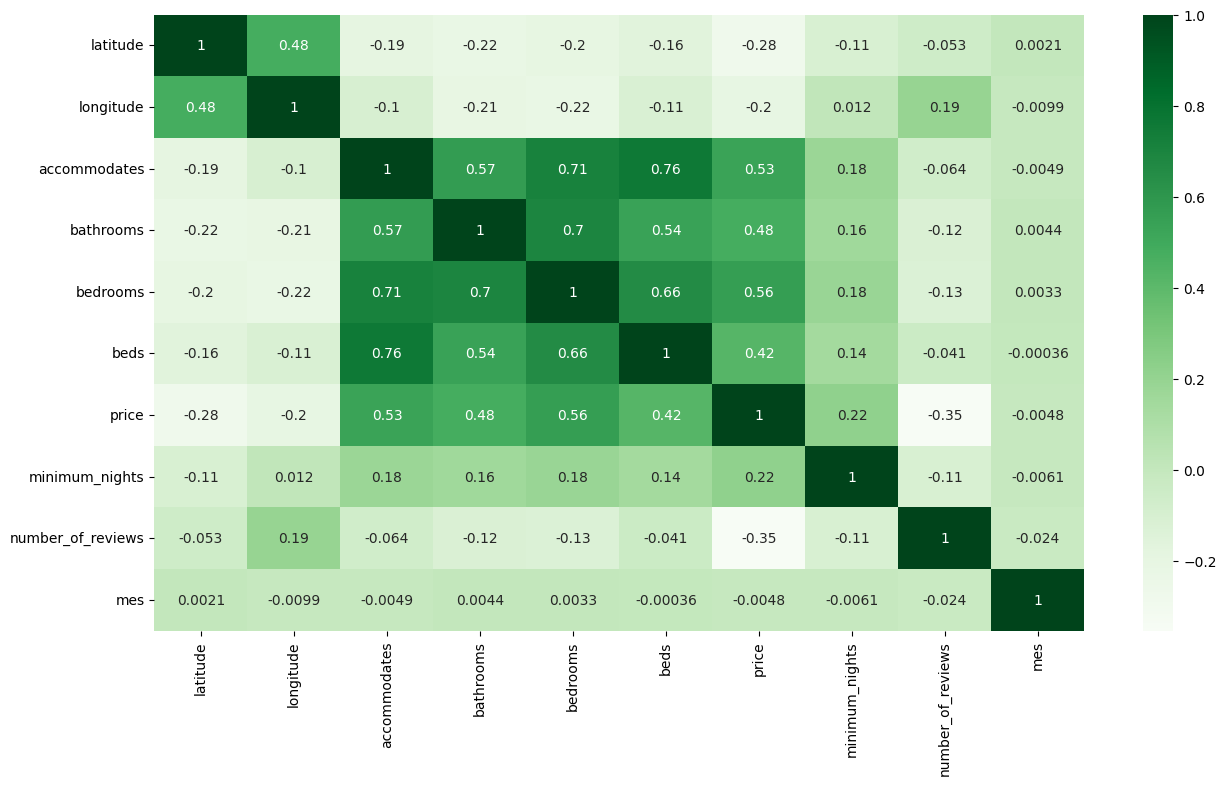

In [42]:
# Cria uma figura
plt.figure(figsize=(15,8))
sns.heatmap(df_numeric.corr("spearman"), annot=True, cmap='Greens')

Variáveis que tem uma correlação média-alta com a variável `price`:

    latitude
    longitude
    acommodates
    bathrooms
    bedrooms
    beds
    number_of_reviwes
    minimum_nights
    extra_people

Variáveis que possuem uma correlação muita fraca com a variável `price`:
    
        host_listings_count
        guests_included
        maximum_nights
        

Vamos excluir as variáveis que possuem correlação fraca com a variável alvo

Não temos nenhuma relação muito forte entre as variáveis alvo, então não mexeremos neste ponto

In [36]:
# Lista das colunas que vamos remover
lista_remover=['host_listings_count','guests_included','maximum_nights']

In [37]:
# Remoção
df=df.drop(lista_remover,axis=1)

In [44]:
df

host_is_superhost   latitude  longitude property_type        room_type  \
0                      f -22.946854 -43.182737     Apartment  Entire home/apt   
1                      t -22.965919 -43.178962   Condominium  Entire home/apt   
2                      f -22.985698 -43.201935     Apartment  Entire home/apt   
3                      f -22.977117 -43.190454     Apartment  Entire home/apt   
4                      t -22.983024 -43.214270     Apartment  Entire home/apt   
...                  ...        ...        ...           ...              ...   
902205                 f -23.003180 -43.342840     Apartment  Entire home/apt   
902206                 f -22.966640 -43.393450     Apartment  Entire home/apt   
902207                 f -22.962080 -43.175520     Apartment  Entire home/apt   
902208                 f -23.003400 -43.341820     Apartment  Entire home/apt   
902209                 f -23.010560 -43.363350     Apartment     Private room   

        accommodates  bathrooms  bedrooms  beds  bed_type  \
0                  4        1.0       0.0   2.0  Real Bed   
1                  5        1.0       2.0   2.0  Real Bed   
2                  2        1.0       1.0   1.0  Real Bed   
3                  3        1.0       1.0   2.0  Real Bed   
4                  3        1.0       1.0   2.0  Real Bed   
...              ...        ...       ...   ...       ...   
902205             4        1.0       0.0   2.0  Real Bed   
902206             4        2.0       2.0   3.0  Real Bed   
902207             5        1.0       1.0   2.0  Real Bed   
902208             4        1.0       1.0   1.0  Real Bed   
902209             2        0.0       1.0   1.0  Real Bed   

                                                amenities  price extra_people  \
0       {TV,Internet,"Air conditioning",Kitchen,Doorma...  133.0        34.00   
1       {TV,"Cable TV",Internet,Wifi,"Air conditioning...  270.0        51.00   
2       {TV,"Cable TV",Wifi,"Air conditioning","First ...  222.0       215.00   
3       {TV,"Cable TV",Internet,Wifi,"Air conditioning...  161.0        45.00   
4       {TV,"Cable TV",Internet,Wifi,"Air conditioning...  222.0        68.00   
...                                                   ...    ...          ...   
902205  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...  121.0        50.00   
902206  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...  799.0         0.00   
902207  {TV,Wifi,"Air conditioning",Kitchen,Elevator,W...  420.0        30.00   
902208  {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...  250.0         0.00   
902209  {TV,Kitchen,"Free parking on premises","Smokin...   92.0        80.00   

        minimum_nights  number_of_reviews instant_bookable  \
0                   60                 38                f   
1                    4                205                t   
2                    3                 85                f   
3                    4                208                f   
4                    2                200                t   
...                ...                ...              ...   
902205               1                  0                f   
902206               2                  0                f   
902207               3                  0                f   
902208               1                  0                f   
902209               1                  0                f   

       is_business_travel_ready          cancellation_policy  mes  
0                             f  strict_14_with_grace_period    4  
1                             f                       strict    4  
2                             f                       strict    4  
3                             f                       strict    4  
4                             f                       strict    4  
...                         ...                          ...  ...  
902205                        f                     flexible    9  
902206                        f        

#### <font color='blue'>Indentificação e tratamento de Outliers </font>

Vamos criar uma classe para indentificar e remover os Outliers no nosso conjunto de dados

In [45]:
# Criando uma funcao 
class TrataOutlier:

    # Construtor
    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def count_outliers(self, Q1, Q3, IQR, columns):
        cut_off = IQR * 1.5
        temp_df = (self.df[columns] < (Q1 - cut_off)) | (self.df[columns] > (Q3 + cut_off))
        return [len(temp_df[temp_df[col] == True]) for col in temp_df]

    def calc_skew(self, columns=None):
        if columns == None:
            columns = self.df.columns
        return [self.df[col].skew() for col in columns]

    def percentage(self, list):
        return [str(round(((value/150001) * 100), 2)) + '%' for value in list]

    def remove_outliers(self, columns):
        for col in columns:
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off
            self.df = self.df.drop(self.df[self.df[col] > upper].index)
            self.df = self.df.drop(self.df[self.df[col] < lower].index)

    def replace_outliers_with_fences(self, columns):
        for col in columns:
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off

            self.df[col] = np.where(self.df[col] > upper, upper, self.df[col])
            self.df[col] = np.where(self.df[col] < lower, lower, self.df[col])

    def getOverview(self, columns) -> None:
        min = self.df[columns].min()
        Q1 = self.df[columns].quantile(0.25)
        median = self.df[columns].quantile(0.5)
        Q3 = self.df[columns].quantile(0.75)
        max = self.df[columns].max()
        IQR = Q3 - Q1
        skew = self.calc_skew(columns)
        outliers = self.count_outliers(Q1, Q3, IQR, columns)
        cut_off = IQR * 1.5
        lower, upper = Q1 - cut_off, Q3 + cut_off

        new_columns = ['Nome de Coluna', 'Min', 'Q1', 'Median', 'Q3', 'Max', 'IQR', 'Lower fence', 'Upper fence', 'Skew', 'Num_Outliers', 'Percent_Outliers' ]
        
        data = zip([column for column in self.df[columns]], min, Q1, median, Q3, max, IQR, lower, upper, skew, outliers, self.percentage(outliers))

        new_df = pd.DataFrame(data = data, columns = new_columns)
        
        new_df.set_index('Nome de Coluna', inplace = True)
        \
        return new_df.sort_values('Num_Outliers', ascending = False).transpose()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897307 entries, 0 to 902209
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897307 non-null  object 
 1   latitude                  897307 non-null  float64
 2   longitude                 897307 non-null  float64
 3   property_type             897307 non-null  object 
 4   room_type                 897307 non-null  object 
 5   accommodates              897307 non-null  int64  
 6   bathrooms                 897307 non-null  float64
 7   bedrooms                  897307 non-null  float64
 8   beds                      897307 non-null  float64
 9   bed_type                  897307 non-null  object 
 10  amenities                 897307 non-null  object 
 11  price                     897307 non-null  float64
 12  extra_people              897307 non-null  object 
 13  minimum_nights            897307 non-null  int64 

In [47]:
# Selecionando somente nossas colunas que vamos tratar os Outliers
colunas=['accommodates','bathrooms','bedrooms','beds','price']

In [48]:
# Cria uma instancia daquele objeto
trata_outlier=TrataOutlier(df)

In [49]:
# Visualiza nossa tabelinha de Outliers
trata_outlier.getOverview(colunas)

Nome de Coluna        price bedrooms  bathrooms      beds accommodates
Min                     0.0      0.0        0.0       0.0          1.0
Q1                    151.0      1.0        1.0       1.0          2.0
Median                294.0      1.0        1.0       2.0          4.0
Q3                    601.0      2.0        2.0       3.0          6.0
Max                138288.0     45.0      200.0      86.0        160.0
IQR                   450.0      1.0        1.0       2.0          4.0
Lower fence          -524.0     -0.5       -0.5      -2.0         -4.0
Upper fence          1276.0      3.5        3.5       6.0         12.0
Skew              14.838693  2.50772  42.289182  4.799818     7.368236
Num_Outliers          87009    44691      39740     33175        11011
Percent_Outliers     58.01%   29.79%     26.49%    22.12%        7.34%

In [50]:
# Remover os Outliers
trata_outlier.remove_outliers(colunas)
# O que não for excluido vamos substituir pelo limite
trata_outlier.replace_outliers_with_fences(colunas)

In [51]:
# Visualiza nossa tabelinha de Outliers
trata_outlier.getOverview(colunas)

Nome de Coluna   accommodates bathrooms  bedrooms      beds     price
Min                       1.0       0.0       0.0       0.0       0.0
Q1                        2.0       1.0       1.0       1.0     147.0
Median                    4.0       1.0       1.0       2.0     248.0
Q3                        4.0       2.0       2.0       3.0     418.0
Max                       7.0       3.5       3.0       6.0     824.5
IQR                       2.0       1.0       1.0       2.0     271.0
Lower fence              -1.0      -0.5      -0.5      -2.0    -259.5
Upper fence               7.0       3.5       3.5       6.0     824.5
Skew                 0.364921  1.133033  0.579367  1.049585  1.018171
Num_Outliers                0         0         0         0         0
Percent_Outliers         0.0%      0.0%      0.0%      0.0%      0.0%

Sobre a coluna number_of_reviews:
- Estamos querendo um modelo que ajude a precificar apartamentos comuns como uma pessoa comum gostaria de disponibilizar. No caso, apartamentos com mais de 8 noites como o "mínimo de noites" podem ser apartamentos de temporada ou ainda apartamentos para morar, em que o host exige pelo menos 1 mês no apartamento.

- Por isso, vamos excluir esta coluna

In [52]:
df=df.drop('number_of_reviews',axis=1)

#### <font color='blue'>Análises Univariadas</font>

Não temos nenhuma pergunta de negócio específica para respordermos

Então nosso trabalho aqui é somente uma análise simples para enterdermos nossos dados ainda mais e analisar o comportamento das minhas variáveis

In [53]:
df.shape

(897307, 18)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897307 entries, 0 to 902209
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   host_is_superhost         897307 non-null  object 
 1   latitude                  897307 non-null  float64
 2   longitude                 897307 non-null  float64
 3   property_type             897307 non-null  object 
 4   room_type                 897307 non-null  object 
 5   accommodates              897307 non-null  int64  
 6   bathrooms                 897307 non-null  float64
 7   bedrooms                  897307 non-null  float64
 8   beds                      897307 non-null  float64
 9   bed_type                  897307 non-null  object 
 10  amenities                 897307 non-null  object 
 11  price                     897307 non-null  float64
 12  extra_people              897307 non-null  object 
 13  minimum_nights            897307 non-null  int64 

In [55]:
df.head()

host_is_superhost   latitude  longitude property_type        room_type  \
0                 f -22.946854 -43.182737     Apartment  Entire home/apt   
1                 t -22.965919 -43.178962   Condominium  Entire home/apt   
2                 f -22.985698 -43.201935     Apartment  Entire home/apt   
3                 f -22.977117 -43.190454     Apartment  Entire home/apt   
4                 t -22.983024 -43.214270     Apartment  Entire home/apt   

   accommodates  bathrooms  bedrooms  beds  bed_type  \
0             4        1.0       0.0   2.0  Real Bed   
1             5        1.0       2.0   2.0  Real Bed   
2             2        1.0       1.0   1.0  Real Bed   
3             3        1.0       1.0   2.0  Real Bed   
4             3        1.0       1.0   2.0  Real Bed   

                                           amenities  price extra_people  \
0  {TV,Internet,"Air conditioning",Kitchen,Doorma...  133.0        34.00   
1  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  270.0        51.00   
2  {TV,"Cable TV",Wifi,"Air conditioning","First ...  222.0       215.00   
3  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  161.0        45.00   
4  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  222.0        68.00   

   minimum_nights instant_bookable is_business_travel_ready  \
0              60                f                        f   
1               4                t                        f   
2               3                f                        f   
3               4                f                        f   
4               2                t                        f   

           cancellation_policy  mes  
0  strict_14_with_grace_period    4  
1                       strict    4  
2                       strict    4  
3                       strict    4  
4                       strict    4

Vamos ver primeiro o comportamento das minhas variáveis categóricas

In [56]:
# Visualizando minhas variáveis categóricas
df.select_dtypes(include=['object']).columns.tolist()

['host_is_superhost',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'extra_people',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy']

###### <font color='blue'>"host_is_superhost"</font>

In [57]:
print(df['host_is_superhost'].value_counts())

host_is_superhost
f    801422
t     95885
Name: count, dtype: int64


Aparentemente nossa variável não apresenta nenhum tipo de problema

###### <font color='blue'>"property_type"</font>

property_type
Apartment                 694003
House                      92242
Condominium                39041
Serviced apartment         19536
Loft                       16352
Bed and breakfast           6443
Hostel                      5051
Guest suite                 4767
Guesthouse                  3228
Other                       3220
Villa                       2751
Townhouse                   1603
Hotel                       1451
Aparthotel                  1401
Boutique hotel               870
Earth house                  739
Cottage                      636
Chalet                       610
Tiny house                   589
Boat                         538
Casa particular (Cuba)       415
Cabin                        295
Bungalow                     270
Dorm                         237
Nature lodge                 221
Castle                       151
Treehouse                     76
Farm stay                     72
Island                        64
Tent                         

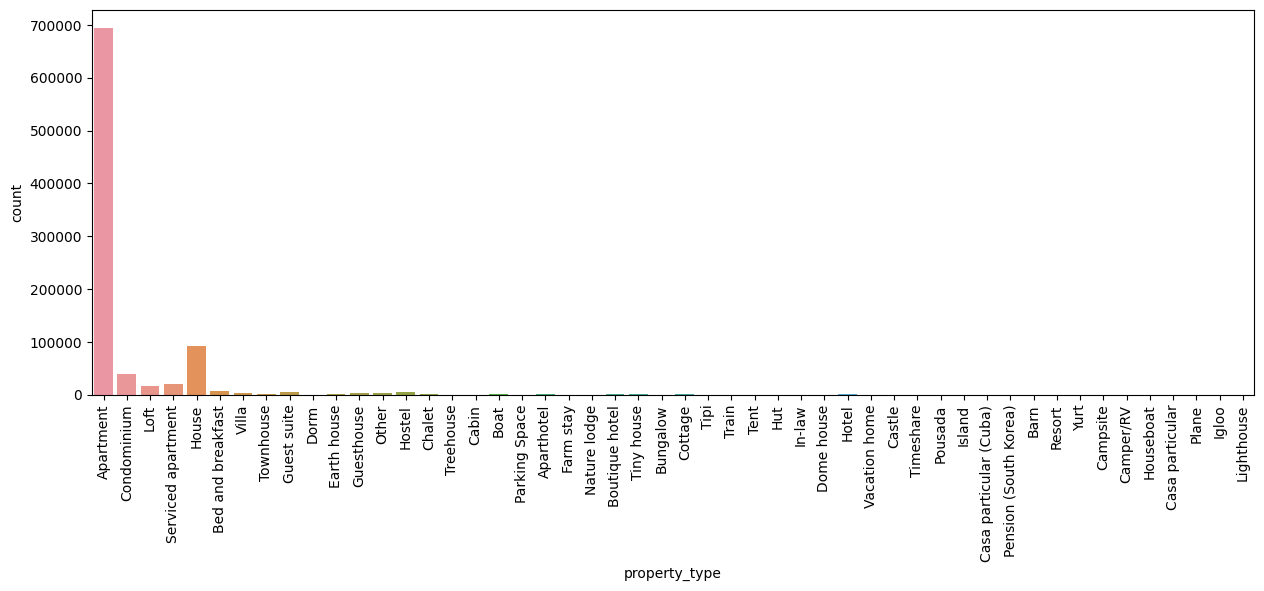

In [58]:
# Visualiza a quantidade para cada valor distinto
print(df['property_type'].value_counts())
# Realizando a plotagem
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df['property_type'])
grafico.tick_params(axis='x', rotation=90)
plt.title='Quantidade por tipo de propriedade'

Temos em nosso conjunto de dados 662199 linhas, sendo que um pouco mais de 500 mil linhas representa apenas uma categoria nesta variável, e isto pode apresentar problemas em nosso modelo

Nesse caso devemos agrupar a maioria das categorias 

Vamos pegar os registros que aparecem menos de 2000 vezes e agrupar com uma categoria chamada "Others"

In [59]:
# Pegar os valores distintos 
valores_distintos=df['property_type'].value_counts()
print(valores_distintos)
# Criar uma lista para armazenar os valores que vamos agrupar
valores_agrupar=[]
for tipo in valores_distintos.index:
    if valores_distintos[tipo] < 2030 :
        valores_agrupar.append(tipo)

property_type
Apartment                 694003
House                      92242
Condominium                39041
Serviced apartment         19536
Loft                       16352
Bed and breakfast           6443
Hostel                      5051
Guest suite                 4767
Guesthouse                  3228
Other                       3220
Villa                       2751
Townhouse                   1603
Hotel                       1451
Aparthotel                  1401
Boutique hotel               870
Earth house                  739
Cottage                      636
Chalet                       610
Tiny house                   589
Boat                         538
Casa particular (Cuba)       415
Cabin                        295
Bungalow                     270
Dorm                         237
Nature lodge                 221
Castle                       151
Treehouse                     76
Farm stay                     72
Island                        64
Tent                         

In [60]:
# Avaliação
valores_agrupar

['Townhouse',
 'Hotel',
 'Aparthotel',
 'Boutique hotel',
 'Earth house',
 'Cottage',
 'Chalet',
 'Tiny house',
 'Boat',
 'Casa particular (Cuba)',
 'Cabin',
 'Bungalow',
 'Dorm',
 'Nature lodge',
 'Castle',
 'Treehouse',
 'Farm stay',
 'Island',
 'Tent',
 'Campsite',
 'Resort',
 'Hut',
 'Vacation home',
 'Barn',
 'Camper/RV',
 'Houseboat',
 'Tipi',
 'Yurt',
 'Pousada',
 'Dome house',
 'Pension (South Korea)',
 'Parking Space',
 'In-law',
 'Igloo',
 'Train',
 'Timeshare',
 'Casa particular',
 'Plane',
 'Lighthouse']

In [61]:
# Fazendo o agrupamento
for tipo in valores_agrupar:
    df.loc[df['property_type']==tipo,'property_type']='Others'

property_type
Apartment             694003
House                  92242
Condominium            39041
Serviced apartment     19536
Loft                   16352
Others                 10673
Bed and breakfast       6443
Hostel                  5051
Guest suite             4767
Guesthouse              3228
Other                   3220
Villa                   2751
Name: count, dtype: int64


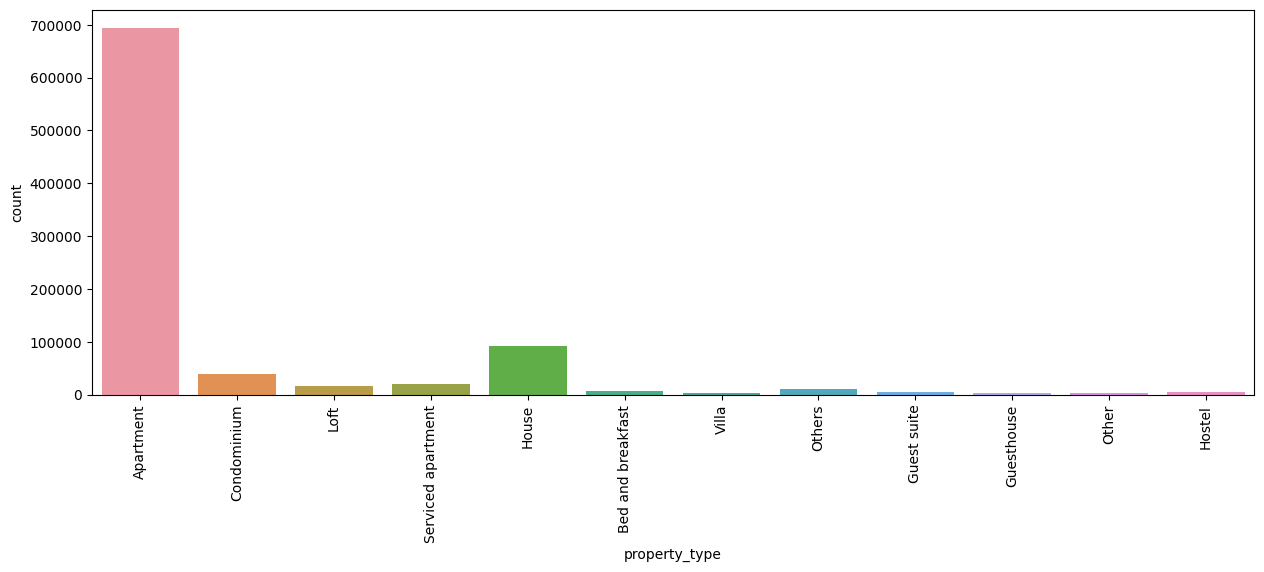

In [62]:
# Avaliação
print(df['property_type'].value_counts())
# Realizando a plotagem
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df['property_type'])
grafico.tick_params(axis='x', rotation=90)
plt.title='Quantidade por tipo de propriedade' 

###### <font color='blue'>"room_type"</font>

room_type
Entire home/apt    634779
Private room       238882
Shared room         21310
Hotel room           2336
Name: count, dtype: int64


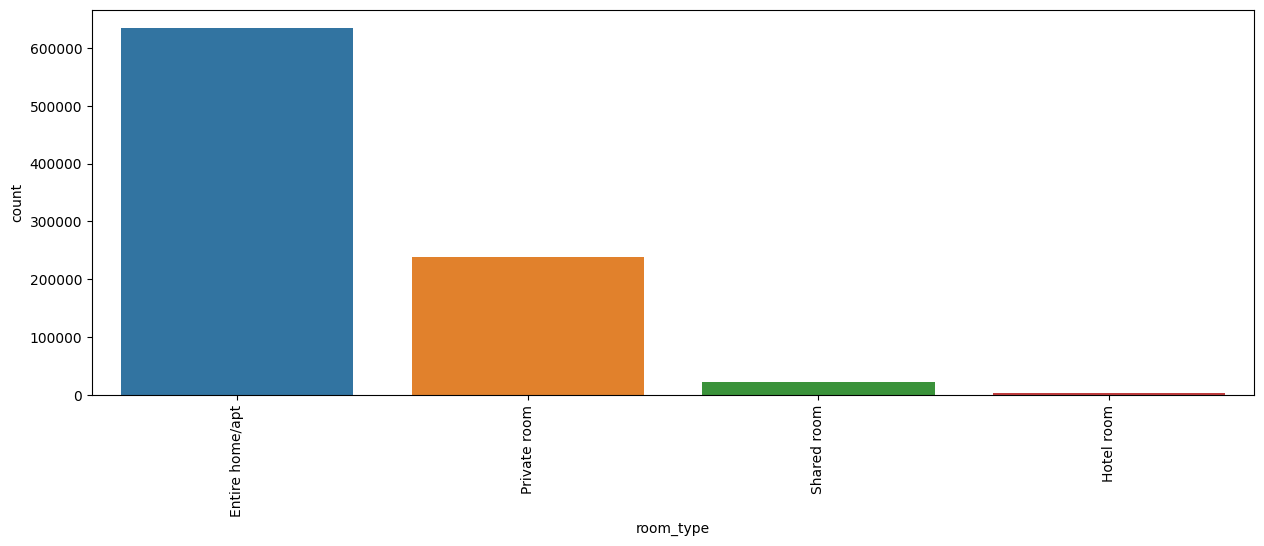

In [63]:
valores_distintos=df['room_type'].value_counts()
print(valores_distintos)
# Realizando a plotagem
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df['room_type'])
grafico.tick_params(axis='x', rotation=90)
plt.title='Quantidade por tipo de quarto' 

Vamos agrupar as duas ultimas variáveis tambem 

In [64]:
# Criar uma lista para armazenar os valores que vamos agrupar
valores_agrupar=[]
for tipo in valores_distintos.index:
    if valores_distintos[tipo]<16000:
        valores_agrupar.append(tipo)

In [65]:
# Avaliação
valores_agrupar

['Hotel room']

In [66]:
# Realizando o agrupamento 
for tipo in valores_agrupar:
    df.loc[df['room_type']==tipo,'room_type']='Others'

room_type
Entire home/apt    634779
Private room       238882
Shared room         21310
Others               2336
Name: count, dtype: int64


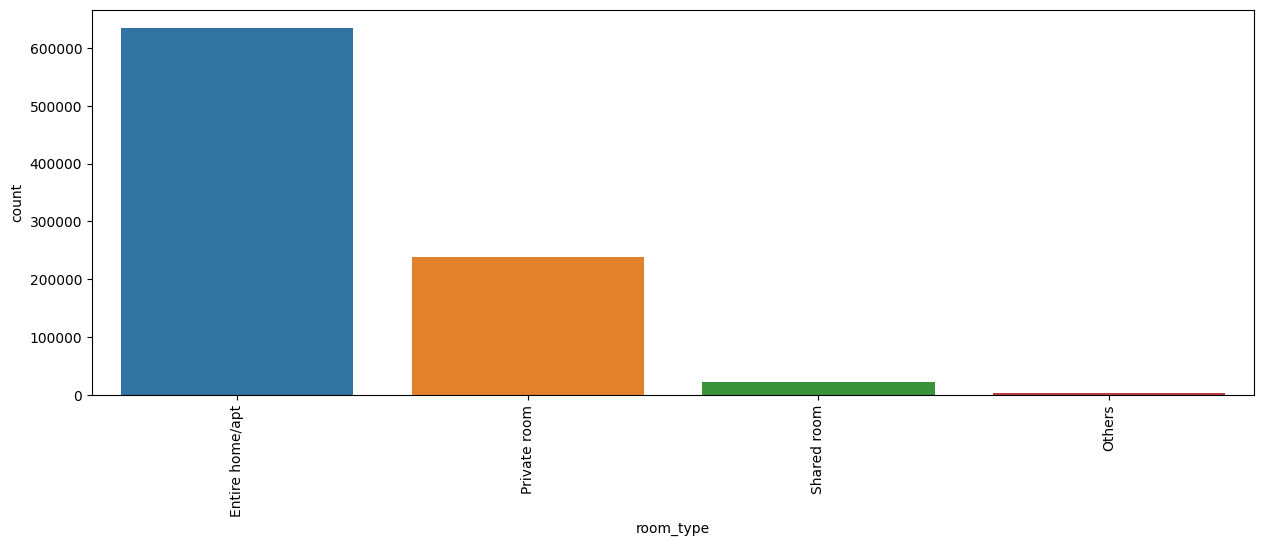

In [67]:
# Avaliação
valores_distintos=df['room_type'].value_counts()
print(valores_distintos)
# Realizando a plotagem
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df['room_type'])
grafico.tick_params(axis='x', rotation=90)
plt.title='Quantidade por tipo de quarto' 

###### <font color='blue'>"bed_type"</font>

bed_type
Real Bed         883264
Pull-out Sofa      9535
Futon              2199
Airbed             1623
Couch               686
Name: count, dtype: int64


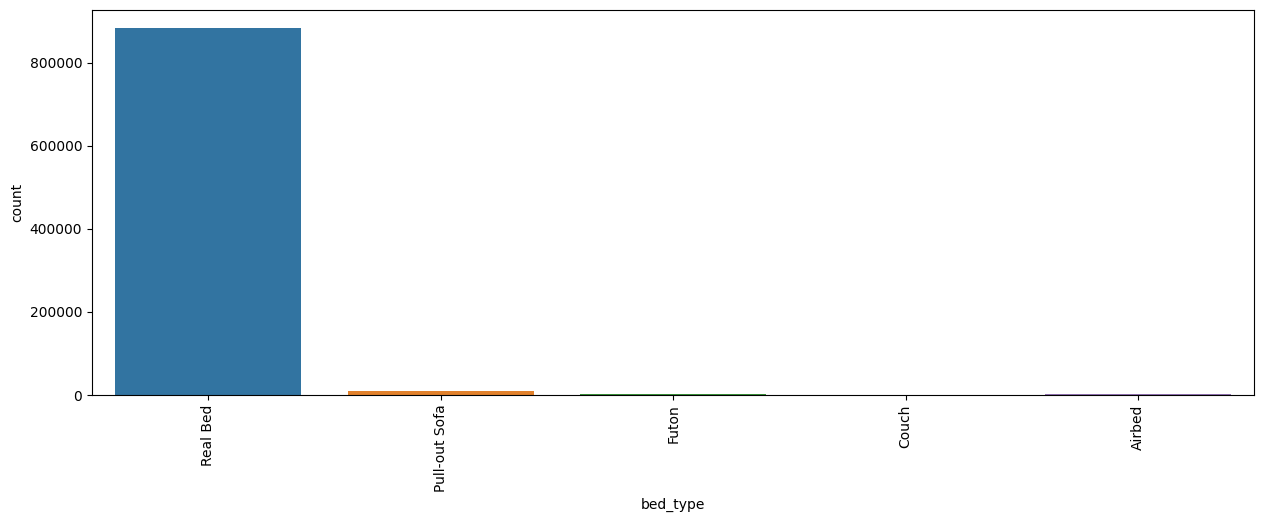

In [68]:
# Verificando a quantidade de valores distintos na minha variável 
valores_distintos=df['bed_type'].value_counts()
print(valores_distintos)
# Realizando a plotagem
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df['bed_type'])
grafico.tick_params(axis='x', rotation=90)
plt.title='Quantidade por tipo de cama'

Nesta variável vamos realizar o mesmo processo de agrupamento de categorias, pois temos uma categoria com um valor muito maior que as demais 

Vamos agrupar todas as categorias que não for a Real Bed

In [69]:
# Lista que armazena os valores que seram agrupados
valores_agrupar=[]
for tipo in valores_distintos.index:
    if valores_distintos[tipo] < 10000 :
        valores_agrupar.append(tipo)

In [70]:
# Realizando o agrupamento 
for tipo in valores_agrupar:
    df.loc[df['bed_type']==tipo,'bed_type']='Others'

bed_type
Real Bed    883264
Others       14043
Name: count, dtype: int64


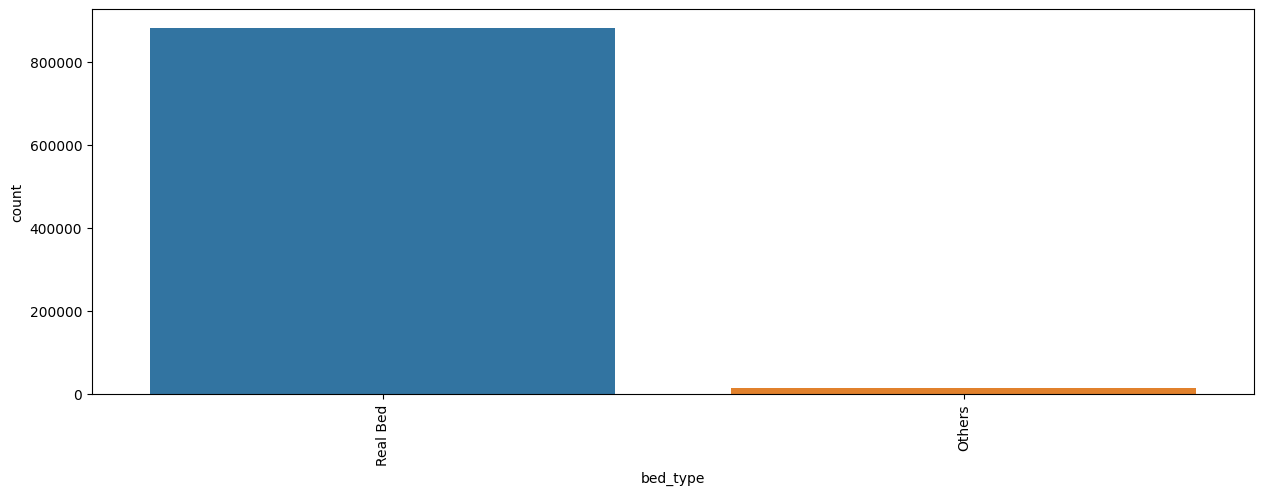

In [71]:
print(df['bed_type'].value_counts())
# Realizando a plotagem
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df['bed_type'])
grafico.tick_params(axis='x', rotation=90)
plt.title='Quantidade por tipo de cama'

In [72]:
# Visualizando minhas variáveis categóricas novamente
df.select_dtypes(include=['object']).columns.tolist()

['host_is_superhost',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'extra_people',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy']

###### <font color='blue'>"amenities"</font>

In [73]:
valores_distintos=df['amenities'].value_counts() 
len(valores_distintos)

111806

In [74]:
df['amenities']

0         {TV,Internet,"Air conditioning",Kitchen,Doorma...
1         {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2         {TV,"Cable TV",Wifi,"Air conditioning","First ...
3         {TV,"Cable TV",Internet,Wifi,"Air conditioning...
4         {TV,"Cable TV",Internet,Wifi,"Air conditioning...
                                ...                        
902205    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
902206    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
902207    {TV,Wifi,"Air conditioning",Kitchen,Elevator,W...
902208    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
902209    {TV,Kitchen,"Free parking on premises","Smokin...
Name: amenities, Length: 897307, dtype: object

Temos uma quantidade de valores distintos muito grande nesta variável

Além do mais no nosso modelo esta variável do jeito que estar traria problemas em nosso modelo

Vamos pegar a quantidade de parâmetros passado e substituir pelas categorias

In [75]:
# Vamos ter uma base de como estar nossa variável 
print(df['amenities'].iloc[1].split(','))
print(len(df['amenities'].iloc[1].split(',')))

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
25


Neste exemplo vamos substituir essas categorias por "25"

In [76]:
# Criando a variável do tamanho de amenities
df['n_amenities']=df['amenities'].str.split(',').apply(len)

In [77]:
# Avaliação
df['n_amenities'].head()

0    11
1    25
2    20
3    14
4    16
Name: n_amenities, dtype: int64

In [78]:
# Verificando o tipo 
df['n_amenities'].dtypes

dtype('int64')

In [79]:
# Apagando a coluna antiga
df=df.drop('amenities',axis=1)

Como nossa variável agora é um valor numérico

Vamos ver se temos um Outliers nela

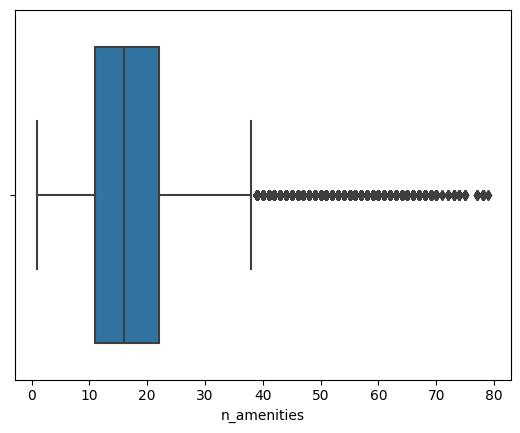

In [80]:
caixa=sns.boxplot(x=df['n_amenities'])

Temos a presença de Outliers

Vamos excluir estes!

In [81]:
coluna=['n_amenities']

In [82]:
# Cria uma instancia daquele objeto
trata_outlier=TrataOutlier(df)

In [83]:
# Visualiza nossa tabelinha de Outliers
trata_outlier.getOverview(coluna)

Nome de Coluna   n_amenities
Min                        1
Q1                      11.0
Median                  16.0
Q3                      22.0
Max                       79
IQR                     11.0
Lower fence             -5.5
Upper fence             38.5
Skew                1.246798
Num_Outliers           36259
Percent_Outliers      24.17%

In [84]:
# Remover os Outliers
trata_outlier.remove_outliers(coluna)
# O que não for excluido vamos substituir pelo limite
trata_outlier.replace_outliers_with_fences(coluna)

In [85]:
# Visualiza nossa tabelinha de Outliers
trata_outlier.getOverview(coluna)

Nome de Coluna   n_amenities
Min                      1.0
Q1                      11.0
Median                  16.0
Q3                      21.0
Max                     36.0
IQR                     10.0
Lower fence             -4.0
Upper fence             36.0
Skew                0.549165
Num_Outliers               0
Percent_Outliers        0.0%

<Axes: xlabel='n_amenities', ylabel='Count'>

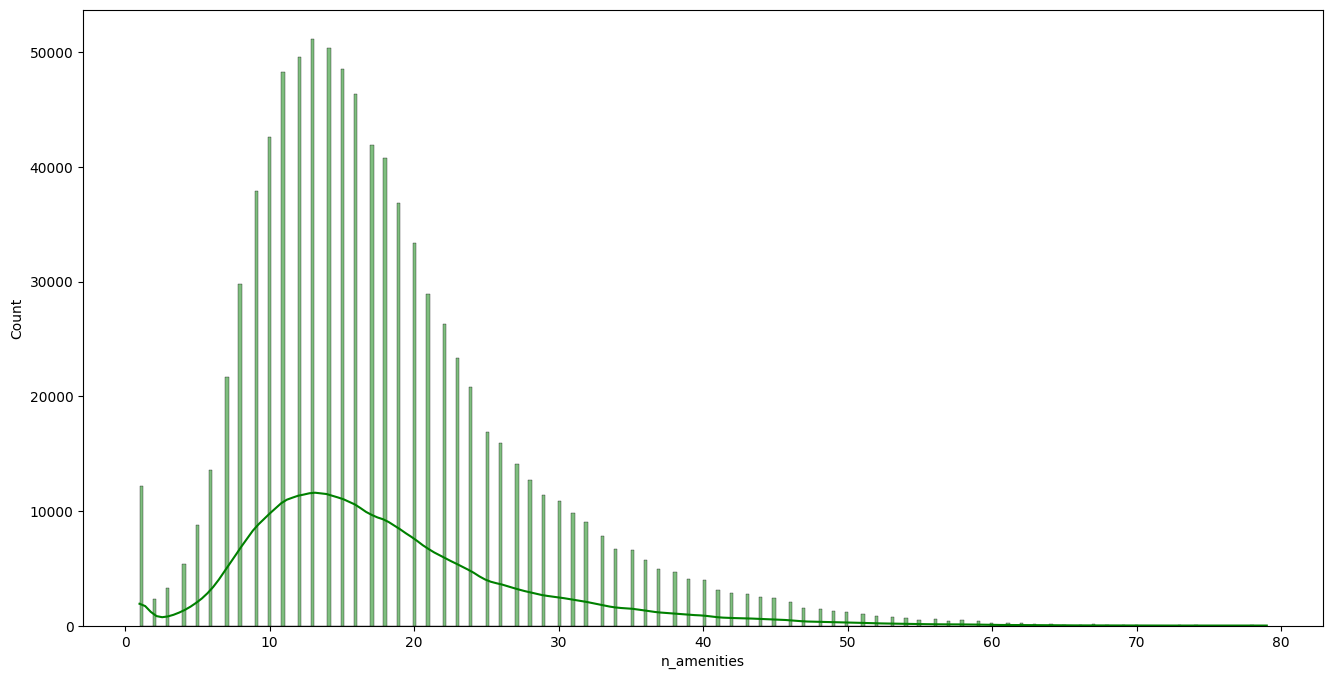

In [86]:
# Visualizando a distribuição da variável
plt.figure(figsize=(16,8))
sns.histplot(x=df['n_amenities'],kde=True,color='green')

In [87]:
# Visualizando minhas variáveis categóricas novamente
df.select_dtypes(include=['object']).columns.tolist()

['host_is_superhost',
 'property_type',
 'room_type',
 'bed_type',
 'extra_people',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy']

###### <font color='blue'>"instant_bookable"</font>

In [88]:
# Visualizando valores distintos da minha variável
print(df['instant_bookable'].value_counts())

instant_bookable
f    553408
t    343899
Name: count, dtype: int64


Nesta variável não temos nada que possa trazer problemas para nosso modelo

###### <font color='blue'>"is_business_travel_ready"</font>

In [89]:
# Visualizando valores distintos da minha variável
print(df['is_business_travel_ready'].value_counts())

is_business_travel_ready
f    897307
Name: count, dtype: int64


Vamos excluir esta variável, pois só apresenta um único valor

In [90]:
# Excluindo a variável
df=df.drop('is_business_travel_ready',axis=1)

###### <font color='blue'>"cancellation_policy"</font>

cancellation_policy
flexible                       383869
strict_14_with_grace_period    336921
moderate                       149122
strict                          16243
super_strict_60                  8200
super_strict_30                  2952
Name: count, dtype: int64


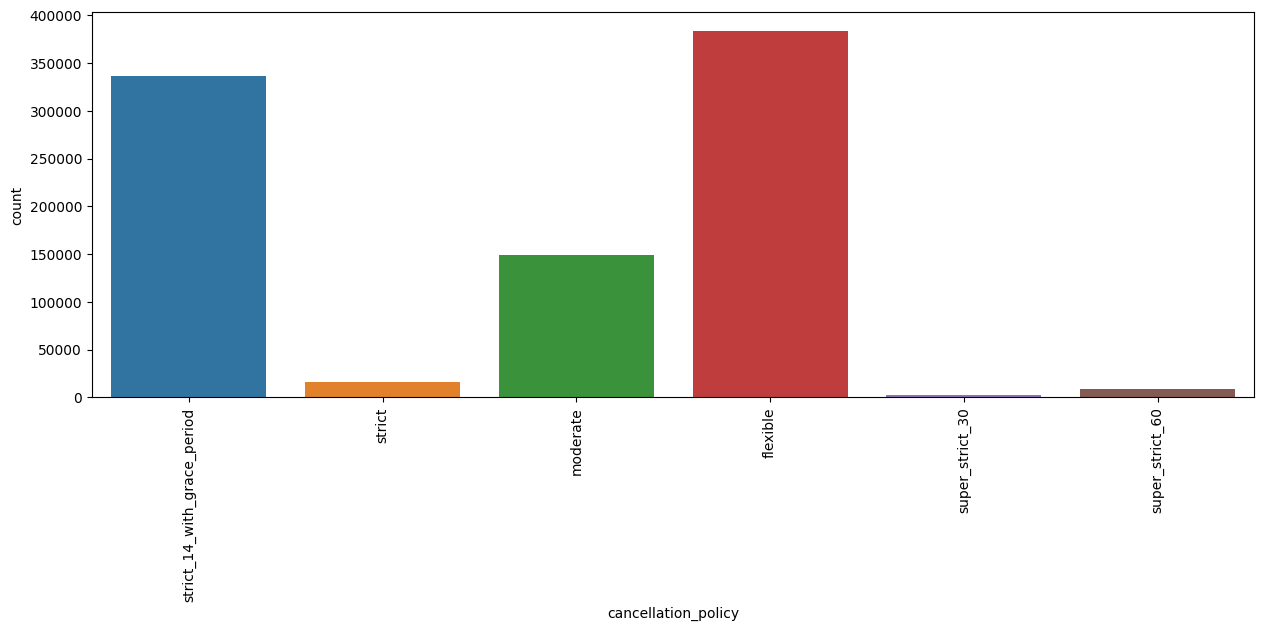

In [91]:
valores_distintos=df['cancellation_policy'].value_counts()
print(valores_distintos)
# Realizando a plotagem
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df['cancellation_policy'])
grafico.tick_params(axis='x', rotation=90)

Vamos realizar o agrupamento com as categorias que aparecem muito pouco

In [92]:
# Lista que armazena os valores que seram agrupados
valores_agrupar=[]
for tipo in valores_distintos.index:
    if valores_distintos[tipo] < 17000 :
        valores_agrupar.append(tipo)

In [93]:
valores_agrupar

['strict', 'super_strict_60', 'super_strict_30']

In [94]:
# Realizando o agrupamento 
for tipo in valores_agrupar:
    df.loc[df['cancellation_policy']==tipo,'cancellation_policy']='Others'

cancellation_policy
flexible                       383869
strict_14_with_grace_period    336921
moderate                       149122
Others                          27395
Name: count, dtype: int64


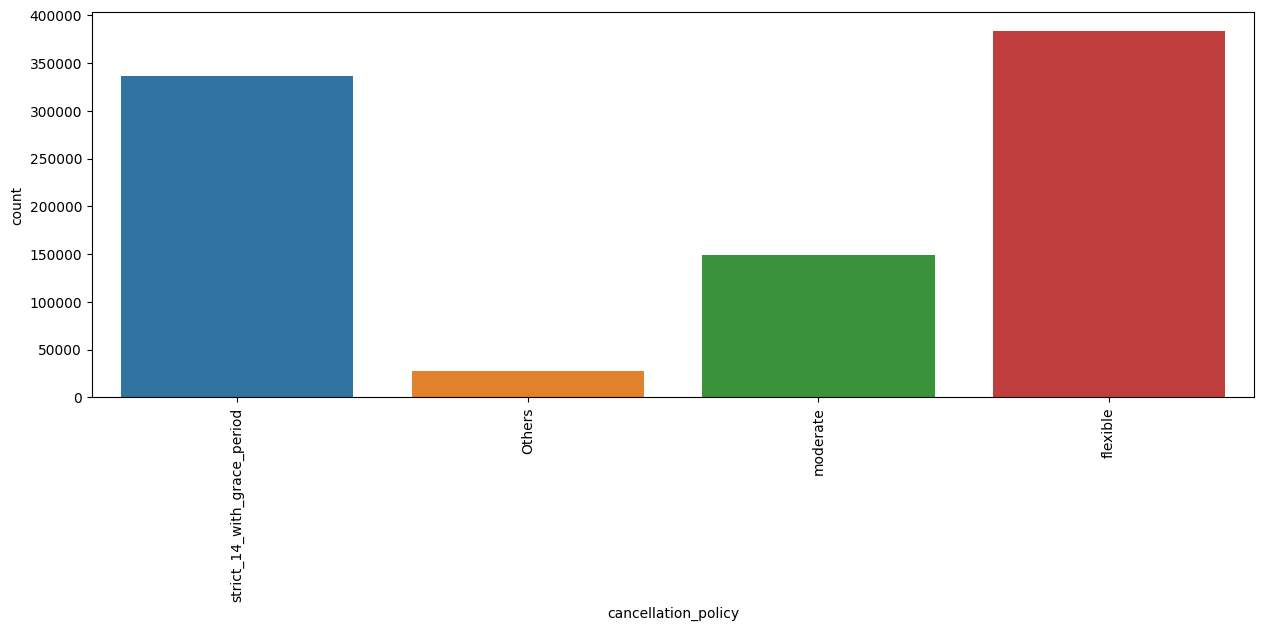

In [95]:
valores_distintos=df['cancellation_policy'].value_counts()
print(valores_distintos)
# Realizando a plotagem
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x=df['cancellation_policy'])
grafico.tick_params(axis='x', rotation=90)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897307 entries, 0 to 902209
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   host_is_superhost    897307 non-null  object 
 1   latitude             897307 non-null  float64
 2   longitude            897307 non-null  float64
 3   property_type        897307 non-null  object 
 4   room_type            897307 non-null  object 
 5   accommodates         897307 non-null  int64  
 6   bathrooms            897307 non-null  float64
 7   bedrooms             897307 non-null  float64
 8   beds                 897307 non-null  float64
 9   bed_type             897307 non-null  object 
 10  price                897307 non-null  float64
 11  extra_people         897307 non-null  object 
 12  minimum_nights       897307 non-null  int64  
 13  instant_bookable     897307 non-null  object 
 14  cancellation_policy  897307 non-null  object 
 15  mes                  8

In [97]:
df

host_is_superhost   latitude  longitude property_type        room_type  \
0                      f -22.946854 -43.182737     Apartment  Entire home/apt   
1                      t -22.965919 -43.178962   Condominium  Entire home/apt   
2                      f -22.985698 -43.201935     Apartment  Entire home/apt   
3                      f -22.977117 -43.190454     Apartment  Entire home/apt   
4                      t -22.983024 -43.214270     Apartment  Entire home/apt   
...                  ...        ...        ...           ...              ...   
902205                 f -23.003180 -43.342840     Apartment  Entire home/apt   
902206                 f -22.966640 -43.393450     Apartment  Entire home/apt   
902207                 f -22.962080 -43.175520     Apartment  Entire home/apt   
902208                 f -23.003400 -43.341820     Apartment  Entire home/apt   
902209                 f -23.010560 -43.363350     Apartment     Private room   

        accommodates  bathrooms  bedrooms  beds  bed_type  price extra_people  \
0                  4        1.0       0.0   2.0  Real Bed  133.0        34.00   
1                  5        1.0       2.0   2.0  Real Bed  270.0        51.00   
2                  2        1.0       1.0   1.0  Real Bed  222.0       215.00   
3                  3        1.0       1.0   2.0  Real Bed  161.0        45.00   
4                  3        1.0       1.0   2.0  Real Bed  222.0        68.00   
...              ...        ...       ...   ...       ...    ...          ...   
902205             4        1.0       0.0   2.0  Real Bed  121.0        50.00   
902206             4        2.0       2.0   3.0  Real Bed  799.0         0.00   
902207             5        1.0       1.0   2.0  Real Bed  420.0        30.00   
902208             4        1.0       1.0   1.0  Real Bed  250.0         0.00   
902209             2        0.0       1.0   1.0  Real Bed   92.0        80.00   

        minimum_nights instant_bookable          cancellation_policy  mes  \
0                   60                f  strict_14_with_grace_period    4   
1                    4                t                       Others    4   
2                    3                f                       Others    4   
3                    4                f                       Others    4   
4                    2                t                       Others    4   
...                ...              ...                          ...  ...   
902205               1                f                     flexible    9   
902206               2                f                     flexible    9   
902207               3                f  strict_14_with_grace_period    9   
902208               1                f  strict_14_with_grace_period    9   
902209               1                f  strict_14_with_grace_period    9   

        n_amenities  
0                11  
1                25  
2                20  
3                14  
4                16  
...             ...  
902205           18  
902206           12  
902207            9  
902208           25  
902209           17  

[897307 rows x 17 columns]

#### <font color='blue'>Análise descritiva</font>

Vamos formular algumas perguntas pra gente entender melhor nosso conjunto de dados

    1-Total dos preços dos imóveis por tipo de quarto?
    2-Total dos preços dos imóveis por tipo de propriedade?
    3-Total dos preços dos imóveis pela quantidade de acomodações?
    4-Como se da os preços dependo da localidade?
    5-Qual a média dos preços dos imóveis?
    6-Dado esta média,qual o pdrão dos imóveis que possuem um preço acima da média?
    7-A data influência nos preços dos imóveis?

##### 1-Total dos preços dos imóveis por tipo de quarto?

In [98]:
# Realizando o agrupamento
tabela=df[['room_type','price']].groupby('room_type').sum()
tabela['price'].sort_values(ascending=False)

room_type
Entire home/apt    508590364.0
Private room        64874693.0
Shared room          5015578.0
Others               1727895.0
Name: price, dtype: float64

##### 2-Total dos preços dos imóveis por tipo de propriedade?

In [99]:
# Realizando o agrupamento
tabela=df[['property_type','price']].groupby('property_type').sum()
tabela['price'].sort_values(ascending=False)

property_type
Apartment             422413289.0
House                  97997767.0
Condominium            19771692.0
Others                  9438346.0
Loft                    8087335.0
Serviced apartment      7823703.0
Villa                   7709518.0
Bed and breakfast       2339154.0
Other                   1584304.0
Guest suite             1204028.0
Hostel                  1070823.0
Guesthouse               768571.0
Name: price, dtype: float64

##### 3-Total dos preços dos imóveis por acomodações?

In [100]:
# Realizando o agrupamento
tabela=df[['accommodates','price']].groupby('accommodates').sum()
tabela['price'].sort_values(ascending=False)

accommodates
4      126998181.0
6      110242596.0
2       64747149.0
8       60043312.0
5       50325756.0
10      43579891.0
3       32336639.0
7       21187209.0
12      17683001.0
16      16701240.0
1       11982460.0
14       7211525.0
9        6656734.0
15       6247658.0
13       1925486.0
11       1863179.0
22        157755.0
25        110330.0
24         72004.0
160        55923.0
18         30389.0
20         30076.0
36         10441.0
64          9596.0
Name: price, dtype: float64

#### 4-Como se da os preços dependo da localidade?

In [101]:
amostra = df.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

##### 5-Qual a média dos preços dos imóveis?

In [102]:
# Média
media=df['price'].mean()
print(media)

646.6109480924589


##### 6-Dado esta média,qual o pdrão dos imóveis que possuem um preço acima da média?

In [103]:
# Tabela só com os valores onde o preço estar acima da média
tabela=df[df['price']>media]
tabela

host_is_superhost   latitude  longitude property_type        room_type  \
9                      f -22.986333 -43.202563     Apartment  Entire home/apt   
13                     f -22.985507 -43.204096     Apartment  Entire home/apt   
15                     f -23.003075 -43.309112         House  Entire home/apt   
17                     f -23.008249 -43.291962         House  Entire home/apt   
19                     f -22.930460 -43.174499     Apartment  Entire home/apt   
...                  ...        ...        ...           ...              ...   
902113                 t -22.964200 -43.176890     Apartment  Entire home/apt   
902121                 t -22.994580 -43.408210         House  Entire home/apt   
902139                 f -23.009450 -43.329020     Apartment  Entire home/apt   
902148                 t -22.994490 -43.408360         House  Entire home/apt   
902206                 f -22.966640 -43.393450     Apartment  Entire home/apt   

        accommodates  bathrooms  bedrooms  beds  bed_type   price  \
9                 14        7.0       6.0   7.0  Real Bed  3241.0   
13                 8        4.0       3.0   3.0  Real Bed   844.0   
15                12        7.0       4.0   7.0  Real Bed  2123.0   
17                10        5.0       4.0   6.0  Real Bed   854.0   
19                 6        2.0       4.0   4.0  Real Bed   758.0   
...              ...        ...       ...   ...       ...     ...   
902113            10        4.5       3.0   4.0  Real Bed  1190.0   
902121             8        6.5       4.0   6.0  Real Bed   690.0   
902139             5        3.0       3.0   4.0  Real Bed  1202.0   
902148             8        6.5       4.0   0.0  Real Bed   799.0   
902206             4        2.0       2.0   3.0  Real Bed   799.0   

       extra_people  minimum_nights instant_bookable  \
9            126.00               2                t   
13           126.00               2                t   
15             0.00               1                f   
17           154.00               2                f   
19           118.00               7                f   
...             ...             ...              ...   
902113         0.00               2                f   
902121       150.00               2                f   
902139         0.00               5                f   
902148       100.00               2                f   
902206         0.00               2                f   

                cancellation_policy  mes  n_amenities  
9                            Others    4           22  
13                           Others    4           39  
15                           Others    4           29  
17                           Others    4           12  
19                           Others    4           33  
...                             ...  ...          ...  
902113  strict_14_with_grace_period    9           23  
902121  strict_14_with_grace_period    9           51  
902139  strict_14_with_grace_period    9           29  
902148  strict_14_with_grace_period    9           51  
902206                     flexible    9           12  

[213822 rows x 17 columns]

In [104]:
tabela.drop(['latitude','longitude'],axis=1).describe()

accommodates      bathrooms       bedrooms           beds  \
count  213822.000000  213822.000000  213822.000000  213822.000000   
mean        6.005776       2.503650       2.518141       3.668715   
std         3.341572       1.809215       1.256824       2.506054   
min         1.000000       0.000000       0.000000       0.000000   
25%         4.000000       2.000000       2.000000       2.000000   
50%         6.000000       2.000000       2.000000       3.000000   
75%         7.000000       3.000000       3.000000       5.000000   
max       160.000000     200.000000      18.000000      69.000000   

               price  minimum_nights            mes    n_amenities  
count  213822.000000   213822.000000  213822.000000  213822.000000  
mean     1913.401970        6.063674       6.348220      16.839928  
std      3160.795939       21.081388       3.416913       8.101190  
min       647.000000        1.000000       1.000000       1.000000  
25%       830.000000        1.000000       4.000000      12.000000  
50%      1102.000000        3.000000       6.000000      16.000000  
75%      1799.000000        7.000000       9.000000      20.000000  
max    138288.000000     1095.000000      12.000000      70.000000

In [105]:
print(tabela['property_type'].value_counts())
print("----------------------------------------")
print(tabela['room_type'].value_counts())
print("----------------------------------------")
print(tabela['bed_type'].value_counts())

property_type
Apartment             170085
House                  27619
Condominium             6818
Others                  2215
Serviced apartment      2174
Loft                    2084
Villa                   1177
Other                    557
Bed and breakfast        499
Guest suite              231
Hostel                   186
Guesthouse               177
Name: count, dtype: int64
----------------------------------------
room_type
Entire home/apt    197634
Private room        14681
Shared room          1112
Others                395
Name: count, dtype: int64
----------------------------------------
bed_type
Real Bed    211805
Others        2017
Name: count, dtype: int64


A média do numero de quartos e banheiros de imóveis que possuem um preço acima da méida é 2
e a média do numero de cama é 3

A variável `accommodates` não influencia tanto assim no preço do imóvel

É percebitível que existem lugares onde o preço do imóvel é mais alto

Os apartamentos,os tipos de quarto "Entire home/apt" e os imóveis que possuem o tipo de cama "Real Bed" tem preços acima da média

## <font color='blue'>Pré-Processamento</font>

Vamos aplicar:
    
        Enconding

In [106]:
df.shape

(897307, 17)

In [107]:
df.head()

host_is_superhost   latitude  longitude property_type        room_type  \
0                 f -22.946854 -43.182737     Apartment  Entire home/apt   
1                 t -22.965919 -43.178962   Condominium  Entire home/apt   
2                 f -22.985698 -43.201935     Apartment  Entire home/apt   
3                 f -22.977117 -43.190454     Apartment  Entire home/apt   
4                 t -22.983024 -43.214270     Apartment  Entire home/apt   

   accommodates  bathrooms  bedrooms  beds  bed_type  price extra_people  \
0             4        1.0       0.0   2.0  Real Bed  133.0        34.00   
1             5        1.0       2.0   2.0  Real Bed  270.0        51.00   
2             2        1.0       1.0   1.0  Real Bed  222.0       215.00   
3             3        1.0       1.0   2.0  Real Bed  161.0        45.00   
4             3        1.0       1.0   2.0  Real Bed  222.0        68.00   

   minimum_nights instant_bookable          cancellation_policy  mes  \
0              60                f  strict_14_with_grace_period    4   
1               4                t                       Others    4   
2               3                f                       Others    4   
3               4                f                       Others    4   
4               2                t                       Others    4   

   n_amenities  
0           11  
1           25  
2           20  
3           14  
4           16

#### <font color='blue'>Enconding</font>

 Vamos realizar o processo de Enconding
 
     Para variévis binárias--substituir por 1 (Verdadeiro) e 0 (falso)
     Para variáveis categóricas--utilizar o One-hot-Enconding

#### <font color='blue'>Codificação nas variáveis binárias</font>

In [108]:
df[['host_is_superhost','instant_bookable']].head()

host_is_superhost instant_bookable
0                 f                f
1                 t                t
2                 f                f
3                 f                f
4                 t                t

In [109]:
# host_is_superhost
df['host_is_superhost']=df['host_is_superhost'].replace('f','0')
df['host_is_superhost']=df['host_is_superhost'].replace('t','1')
# instant_bookable
df['instant_bookable']=df['instant_bookable'].replace('f','0')
df['instant_bookable']=df['instant_bookable'].replace('t','1')

In [110]:
# Avaliação
df[['host_is_superhost','instant_bookable']].value_counts()

host_is_superhost  instant_bookable
0                  0                   503311
                   1                   298111
1                  0                    50097
                   1                    45788
Name: count, dtype: int64

#### <font color='blue'>Codificação usando o One-hot-Enconding</font>

Iremos utilizar o One-hot-Enconding, pois se usarmos o Label-Enconding nosso modelo poderia interpretar que existe uma lógica ordinal em nossas variáveis categóricas, já que substituimos a categoria por um numero qualquer

In [111]:
# Variáveis categóricas
df[['property_type','room_type','bed_type','cancellation_policy']]

property_type        room_type  bed_type          cancellation_policy
0          Apartment  Entire home/apt  Real Bed  strict_14_with_grace_period
1        Condominium  Entire home/apt  Real Bed                       Others
2          Apartment  Entire home/apt  Real Bed                       Others
3          Apartment  Entire home/apt  Real Bed                       Others
4          Apartment  Entire home/apt  Real Bed                       Others
...              ...              ...       ...                          ...
902205     Apartment  Entire home/apt  Real Bed                     flexible
902206     Apartment  Entire home/apt  Real Bed                     flexible
902207     Apartment  Entire home/apt  Real Bed  strict_14_with_grace_period
902208     Apartment  Entire home/apt  Real Bed  strict_14_with_grace_period
902209     Apartment     Private room  Real Bed  strict_14_with_grace_period

[897307 rows x 4 columns]

In [112]:
colunas_categorias = ['property_type','room_type','bed_type','cancellation_policy']
df = pd.get_dummies(data=df, columns=colunas_categorias)

In [113]:
# Avaliado nosso df
df.head(10)

host_is_superhost   latitude  longitude  accommodates  bathrooms  bedrooms  \
0                 0 -22.946854 -43.182737             4        1.0       0.0   
1                 1 -22.965919 -43.178962             5        1.0       2.0   
2                 0 -22.985698 -43.201935             2        1.0       1.0   
3                 0 -22.977117 -43.190454             3        1.0       1.0   
4                 1 -22.983024 -43.214270             3        1.0       1.0   
5                 1 -22.988165 -43.193588             3        1.5       1.0   
6                 1 -22.981269 -43.190457             2        1.0       1.0   
7                 0 -22.966808 -43.186574             3        1.0       1.0   
8                 0 -22.921990 -43.183836             3        1.0       0.0   
9                 0 -22.986333 -43.202563            14        7.0       6.0   

   beds   price extra_people  minimum_nights  ... room_type_Entire home/apt  \
0   2.0   133.0        34.00              60  ...                      True   
1   2.0   270.0        51.00               4  ...                      True   
2   1.0   222.0       215.00               3  ...                      True   
3   2.0   161.0        45.00               4  ...                      True   
4   2.0   222.0        68.00               2  ...                      True   
5   2.0   308.0        86.00               2  ...                      True   
6   2.0   219.0        80.00               3  ...                      True   
7   2.0   150.0       150.00               4  ...                      True   
8   2.0   120.0         0.00               3  ...                      True   
9   7.0  3241.0       126.00               2  ...                      True   

   room_type_Others  room_type_Private room  room_type_Shared room  \
0             False                   False                  False   
1             False                   False                  False   
2             False                   False                  False   
3             False                   False                  False   
4             False                   False                  False   
5             False                   False                  False   
6             False                   False                  False   
7             False                   False                  False   
8             False                   False                  False   
9             False                   False                  False   

   bed_type_Others  bed_type_Real Bed  cancellation_policy_Others  \
0            False               True                       False   
1            False               True                        True   
2            False               True                        True   
3            False               True                        True   
4            False               True                        True   
5            False               True                        True   
6            False               True                        True   
7            False               True                       False   
8            False               True                        True   
9            False               True                        True   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                         False                         False   
1                         False                         False   
2                         False                         False   
3                         False                         False   
4                         False                         False   
5                         False                         False   
6                         False                         False   
7                         False                          True   
8                         False                         False   
9                         False                         False   

   c

In [114]:
# Avaliado nosso df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897307 entries, 0 to 902209
Data columns (total 35 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   host_is_superhost                                897307 non-null  object 
 1   latitude                                         897307 non-null  float64
 2   longitude                                        897307 non-null  float64
 3   accommodates                                     897307 non-null  int64  
 4   bathrooms                                        897307 non-null  float64
 5   bedrooms                                         897307 non-null  float64
 6   beds                                             897307 non-null  float64
 7   price                                            897307 non-null  float64
 8   extra_people                                     897307 non-null  object 
 9   minimum_nights      

In [135]:
def convert_to_float(df, columns):
    for col in columns:
        df[col] = df[col].astype("float")

In [140]:
 convert_to_int(df, ['instant_bookable'])

Pronto!! 

A parte da codificação já foi

Agora que já limpamos e fizemos o pré-processamento vamos realizar modelagem preditiva


## <font color='blue'>Modelagem Preditiva</font>

Agora chegou a hora de aplicarmos inteligência em nosso conjunto de dados

Vamos seguir 7 passos:

    1-Definir se é um problema de Regressão ou Classificação
    2-Escolher as métricas para avaliação do modelo
    3-Escolher os modelos que vamos testar e usar
    4-Faremos os teste e treino dos modelos escolhidos 
    5-Comparar e esolher os melhores modelos para a previsão
    6-Analisar o Modelo mais a fundo
    7-Fazer ajuste no melhor modelo

#### <font color='blue'>1-Definir se é um problema de Regressão ou Classificação</font>

Se fosse uma categoria ou um valor binário,iriamos utilizar a classificação

Mas como queremos prever um valor numérico vamos utilizar a:

            Regressão

#### <font color='blue'> 2-Escolher as métricas para avaliação do modelo</font>

Nesta parte vamos definir os parâmetros que vamos levar em consideração para a escolha do nosso modelo
vamos utilizar o R² e o RSME (Erro quadrático médio)
De forma simples:
    
            1- o R² nos mostra o quanto aquele algoritmo consegue explicar 
            da variação do conjunto de dados
            varia de 0-1, qunato maior, melhor 
            2- o RSME nos mostra o quanto aquele algoritmo não consegue explicar 
            do nosso conjunto de dados, quanto menor melhor

In [115]:
# Criando uma função para avaliação do modelo
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

#### <font color='blue'>3-Escolher os modelos que vamos testar e usar</font>

Vamos testar 3:
             
             Linear Regression
             Random Forest Regressor 
             Extra tress
    

In [116]:
# Criar uma instância das classes
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }

# Variável alvo
y = df['price']
# Variável preditora
X = df.drop('price', axis=1)

#### <font color='blue'> 4-Divisão de treinamento e teste no nosso modelo</font>

      Vamos utilizar 80% do nosso conjunto de dados para treino e 20% para teste

In [117]:
# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [118]:
%%time
# Criando um for para treinar e testar nossos modelos
for nome_modelo, modelo in modelos.items():
    # treinar
    modelo.fit(X_train, y_train)
    # testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao)) 

Modelo RandomForest:
R²:91.72%
RSME:498.68
Modelo LinearRegression:
R²:14.48%
RSME:1602.67
Modelo ExtraTrees:
R²:92.02%
RSME:489.43
Wall time: 31min 40s


#### <font color='blue'>5-Comparar e escolher o melhor modelos para a previsão </font>

Neste cenário, a Regressão linear já é um modelo a ser excluido, pois não apresenta os melhores resultados.

Comparando o Random Forest e o modelo Extras Trees,como eles apresentaram resultados até que parecidos  vamos utilizar o ExtraTrees,pois além dele ter melhores resultados,aparenta ser mais rápido e ser mais "simples"

#### <font color='blue'>6-Analisar o Modelo escolhido mais a fundo</font>

Nesta parte vamos analisar mais a fundo o modelo, onde aqui: 

    Iremos ver como o modelo estar funcionando
    Quais colunas ele mais considera e quais ele menos considera
    Testar a remoção de colunas

In [119]:
# Verificando o nível de importãncia das colunas
print(modelo_et.feature_importances_)
print(X_train.columns)
# Criar um Dataframe com nosso resultado
importancia_features=pd.DataFrame(modelo_et.feature_importances_,X_train.columns)
importancia_features=importancia_features.sort_values(by=0,ascending=False)

[7.67902755e-03 1.22161229e-01 1.22176633e-01 8.43190225e-02
 1.06756675e-01 8.80649158e-02 6.62382054e-02 4.08296731e-02
 1.13741850e-01 2.48464015e-02 2.58220641e-02 9.74388701e-02
 7.83521884e-03 2.18261433e-04 2.82188603e-03 1.73692378e-04
 5.88606810e-05 1.08863425e-04 1.88139099e-02 1.22577630e-03
 3.13932832e-04 5.70705126e-03 6.90114552e-04 7.82697956e-03
 1.76307229e-02 2.94978989e-04 9.69396620e-04 4.32126584e-04
 2.73242515e-04 2.97752290e-04 5.23572209e-03 1.40835292e-02
 8.32307157e-03 6.59034377e-03]
Index(['host_is_superhost', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'minimum_nights',
       'instant_bookable', 'mes', 'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Other

In [120]:
print(importancia_features)
print(importancia_features.shape)

                                                        0
longitude                                        0.122177
latitude                                         0.122161
minimum_nights                                   0.113742
bathrooms                                        0.106757
n_amenities                                      0.097439
bedrooms                                         0.088065
accommodates                                     0.084319
beds                                             0.066238
extra_people                                     0.040830
mes                                              0.025822
instant_bookable                                 0.024846
property_type_House                              0.018814
room_type_Entire home/apt                        0.017631
cancellation_policy_flexible                     0.014084
cancellation_policy_moderate                     0.008323
property_type_Apartment                          0.007835
property_type_

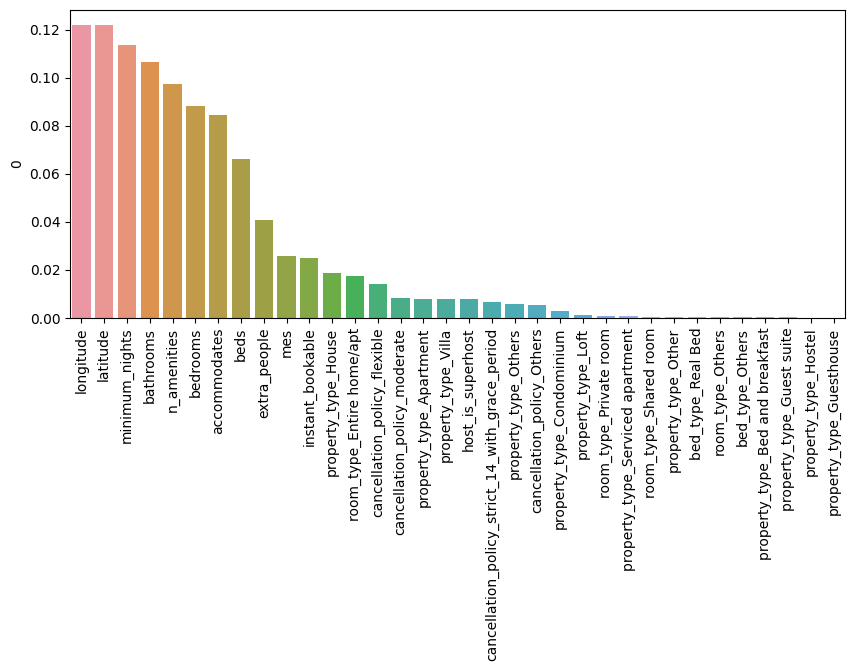

In [121]:
# Plotando nosso dataframe em um gráfico
plt.figure(figsize=(10,4))
ax=sns.barplot(x=importancia_features.index,y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

Aqui podemos perceber quais colunas tem maior e menor relevância para o nosso modelo, a partir daí iremos remover aquelas que tem pouca relevância ou nenhuma para testar se há uma melhora ou piora no nosso modelo.

Pois, iremos preferir modelos eficientes e mais SIMPLES

No nosso caso, iremos remover as colunas do type de cama, pois as categorias desta variável tem pouco impacto no nosso conjunto de dados

#### <font color='blue'>6-Fazer ajuste no modelo</font>

As colunas que iremos remover para fazer o teste vai ser a:

       bed_type_Real
       bed_type_Others

In [122]:
# Fazendo uma cópia do dataframe
df_copia=df.copy()
# Pecorrendo pelas colunas e excluindo aquelas que pertencem a variável do tipo da cama
for coluna in df_copia:
    if 'bed_type' in coluna:    
        df_copia = df_copia.drop(coluna, axis=1)
print(df_copia.columns)
# Definindo as variáveis X e Y 
y = df_copia['price']
X = df_copia.drop('price', axis=1)

Index(['host_is_superhost', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'extra_people',
       'minimum_nights', 'instant_bookable', 'mes', 'n_amenities',
       'property_type_Apartment', 'property_type_Bed and breakfast',
       'property_type_Condominium', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Others', 'property_type_Serviced apartment',
       'property_type_Villa', 'room_type_Entire home/apt', 'room_type_Others',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_Others', 'cancellation_policy_flexible',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period'],
      dtype='object')


In [123]:
# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [124]:
%%time
# Treinando o modelo novamente
modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Modelo ExtraTrees:
R²:92.06%
RSME:488.21
Wall time: 9min 17s


Removendo as colunas, vimos que o R²  não foi modificado, mas o RSME deu uma diminuida, e isto é otimo. 

Pois nosso modelo melhorou tanto de performance quanto de velocidade

OBS: Sempre vamos preferir modelos mais simples

In [127]:
# Visualizaa
df

host_is_superhost   latitude  longitude  accommodates  bathrooms  \
0                      0 -22.946854 -43.182737             4        1.0   
1                      1 -22.965919 -43.178962             5        1.0   
2                      0 -22.985698 -43.201935             2        1.0   
3                      0 -22.977117 -43.190454             3        1.0   
4                      1 -22.983024 -43.214270             3        1.0   
...                  ...        ...        ...           ...        ...   
902205                 0 -23.003180 -43.342840             4        1.0   
902206                 0 -22.966640 -43.393450             4        2.0   
902207                 0 -22.962080 -43.175520             5        1.0   
902208                 0 -23.003400 -43.341820             4        1.0   
902209                 0 -23.010560 -43.363350             2        0.0   

        bedrooms  beds  price extra_people  minimum_nights  ...  \
0            0.0   2.0  133.0        34.00              60  ...   
1            2.0   2.0  270.0        51.00               4  ...   
2            1.0   1.0  222.0       215.00               3  ...   
3            1.0   2.0  161.0        45.00               4  ...   
4            1.0   2.0  222.0        68.00               2  ...   
...          ...   ...    ...          ...             ...  ...   
902205       0.0   2.0  121.0        50.00               1  ...   
902206       2.0   3.0  799.0         0.00               2  ...   
902207       1.0   2.0  420.0        30.00               3  ...   
902208       1.0   1.0  250.0         0.00               1  ...   
902209       1.0   1.0   92.0        80.00               1  ...   

       room_type_Entire home/apt  room_type_Others  room_type_Private room  \
0                           True             False                   False   
1                           True             False                   False   
2                           True             False                   False   
3                           True             False                   False   
4                           True             False                   False   
...                          ...               ...                     ...   
902205                      True             False                   False   
902206                      True             False                   False   
902207                      True             False                   False   
902208                      True             False                   False   
902209                     False             False                    True   

        room_type_Shared room  bed_type_Others  bed_type_Real Bed  \
0                       False            False               True   
1                       False            False               True   
2                       False            False               True   
3                       False            False               True   
4                       False            False               True   
...                       ...              ...                ...   
902205                  False            False               True   
902206                  False            False               True   
902207                  False            False               True   
902208                  False            False               True   
902209                  False            False               True   

        cancellation_policy_Others  cancellation_policy_flexible  \
0                            False                         False   
1                             True                         False   
2                             True                         False   
3                             True                         False   
4                             True                         False   
...                            ...                           ...   
902205                       False                         

## <font color='blue'>Deploy do Modelo</font>

Agora que já concluimos a construção do modelo, vamos colocar em produção. Para que outras pessoas possam usar o algoritmo e consiga visualizar nossa previsão.

Vamos seguir 5 passos:

    1-Salvar a base de dados já tratada
    2-Armazenar o modelo em um arquivo (joblib)
    3-Escolher a forma como iremos fazer o deploy:
                - Mini sistema (Tkinter)
                - Microsite (flask)
                - Uso direto(Streamit)
    4-Criar um novo arquivo 
    5-Importar o Streamit e criar o código do minisite
   

#### <font color='blue'>1-Salvar a base de dados já tratada</font>

In [125]:
# Armazenar a base de dados já limpo no formato de CSV
X['price']=y
X.to_csv('dados.csv')

#### <font color='blue'>2-Armazenar o modelo em um arquivo (joblib)</font>

In [126]:
# Criar o arquivo joblib
import joblib
joblib.dump(modelo_et,'ModeloET.joblib')

['ModeloET.joblib']

#### <font color='blue'>3-Escolher a forma como iremos fazer o deploy:</font>

Iremos utilizar o:

        Streamit

para as etapas 4 5 e 6 irei deixar em outros arquivos python